# **ANALIZA STANOVANJ**

## Uvod
V tej datoteki je predstavljena analiza podatkov o oddaji stanovanj, zbranih s spletne strani [Nepremičnine](https://www.nepremicnine.net/).

Obravnavali bomo vpliv različnih dejavnikov na višino najemnine. Zbrani podatki o stanovanjih so:
* id stanovanja
* kvadratura
* tip (število sob)
* leto
* cena (mesečna najemnina)
* regija
* upravna enota
* občina

In [1]:
import pandas as pd

In [2]:
Stanovanja = pd.read_csv("obdelani-podatki\podatki.csv", index_col='id')

In [3]:
slo_stanovanja = Stanovanja[(Stanovanja.regija != 'Šibeniško-kninska') & (Stanovanja.regija != 'Istrska') & (Stanovanja.regija != 'Primorsko-goranska')]
slo_stanovanja

,kvadratura,tip,leto,cena,regija,upravna,obcina
id,,,,,,,
5568627,15.0,soba,2010,250.0,Koroška,Slovenj Gradec,Slovenj Gradec
5625423,70.0,apartma,2012,80.0,J. Primorska,Izola,Izola
5649165,18.0,garsonjera,2012,350.0,J. Primorska,Piran,Piran
5684479,126.0,3-sobno,1933,1100.0,LJ-mesto,Lj. Center,Ljubljana
5837567,20.0,garsonjera,2017,400.0,LJ-okolica,Domžale,Domžale
...,...,...,...,...,...,...,...
6374194,62.6,2-sobno,2019,800.0,LJ-mesto,Lj. Center,Ljubljana
6374195,54.0,"1,5-sobno",2019,700.0,LJ-mesto,Lj. Vič-Rudnik,Ljubljana
6374204,76.0,3-sobno,2018,950.0,LJ-mesto,Lj. Bežigrad,Ljubljana


Zgornja razpredelnica prikazuje vse zbrane podatke, ki jih analiziramo v tej datoteki. 

## Vprašanja in hipoteze
* Najdrazja najmenina na kvadraturo je na obali, takoj za tem pa ji sledi Ljubljana.

* V katerih regijah se oddajajo največja stanovanja?

* V kateri regiji je največ aktivnih oglasov?

* Starejša stanovanja se oddajajo po višji ceni kot mlajša.

* Kakšen vpliv ima tip stanovanja (število sob) na višino najemnine?

* Stanovanja označena kot primerna za študente so dražja v primerjavi z ostalimi.

## Mesečna najmenina na $m^2$ po regijah
V prvi točki nas zanima kako se mesečne najmenine aktivnih oglasov spreminjajo glede na regije. Podana hipoteza pravi, da so najemnine najvišje na južno primorskem, sledila pa naj bi ji ljubljanska regija.

Za začetek si poglejmo kakšne so povprečne najemnine na trenutnem trgu v Sloveniji.

In [4]:
sum(slo_stanovanja.cena) // 1710

719.0

In [5]:
sum(slo_stanovanja.kvadratura) // 1710

62.0

Povprečna mesečna najemnina stanovanja na strani *nepremičnine.net* je **719€**, povprečna kvadratura pa **62 $m^2$**.

In [6]:
Stanovanja['cena_kvad'] = (Stanovanja.cena // Stanovanja.kvadratura)
slo_stanovanja = Stanovanja[(Stanovanja.regija != 'Šibeniško-kninska') & (Stanovanja.regija != 'Istrska') & (Stanovanja.regija != 'Primorsko-goranska')]

In [7]:
sum(slo_stanovanja.cena_kvad) // 1710

11.0

Kvadratni meter se v Sloveniji v povprečju oddaja za **11€**.

V naslednji dveh tabelah so prikazane cene kvadratur najdražjih ter najcenejših 10 oglaševanih stanovanj.

In [8]:
slo_stanovanja[['cena_kvad', 'kvadratura', 'cena', 'regija']].sort_values('cena_kvad', ascending=False).head(10)

,cena_kvad,kvadratura,cena,regija
id,,,,
6373737,100.0,12.00,1200.0,LJ-mesto
6349093,53.0,9.30,500.0,LJ-mesto
6349088,41.0,14.30,600.0,LJ-mesto
6339175,36.0,15.00,550.0,LJ-mesto
6356638,36.0,13.00,480.0,LJ-mesto
6350807,36.0,217.14,8000.0,LJ-mesto
6246807,34.0,7.00,240.0,LJ-mesto
6365383,33.0,18.00,600.0,LJ-mesto
6366498,33.0,50.00,1690.0,LJ-mesto


In [9]:
slo_stanovanja[['cena_kvad', 'kvadratura', 'cena', 'regija']].sort_values('cena_kvad', ascending=False).tail(10)

,cena_kvad,kvadratura,cena,regija
id,,,,
6351729,1.0,100.3,160.0,Dolenjska
6366494,1.0,105.0,150.0,Podravska
5625423,1.0,70.0,80.0,J. Primorska
6369000,1.0,88.0,135.0,Podravska
6309763,1.0,100.0,100.0,Dolenjska
6372607,1.0,90.0,150.0,Savinjska
6359396,1.0,200.0,300.0,Savinjska
6361060,0.0,121.0,8.0,Savinjska
6317821,0.0,90.9,12.0,Savinjska


Med najdražjimi stanovanji se pojavljajo tista iz ljubljanske regije, kar je v nasprotju s hipotezo. Dalje si bomo ogledali povprečja najemnin po regijah. Omejimo se na stanovanja, ki imajo najmenino nižjo od 60€ /$m^2$.

In [10]:
slo_stanovanja2 = slo_stanovanja[['cena_kvad', 'kvadratura', 'cena', 'regija']][slo_stanovanja.cena_kvad < 60].sort_values('cena_kvad', ascending=False)

In [11]:
Stanovanja_po_regijah = slo_stanovanja2.groupby('regija')

In [12]:
Stanovanja_po_regijah.mean()[['cena_kvad', 'kvadratura', 'cena']].sort_values('cena_kvad', ascending=False)

,cena_kvad,kvadratura,cena
regija,,,
LJ-mesto,13.299369,66.698052,853.436429
J. Primorska,12.062500,50.646806,567.638889
LJ-okolica,10.192661,61.023119,547.981651
Gorenjska,9.906977,56.954651,532.558140
Koroška,9.555556,31.113333,250.888889
S.Primorska,8.600000,67.190000,452.500000
Notranjska,8.125000,48.290000,338.125000
Podravska,7.901235,57.987407,436.839506
Dolenjska,7.072727,52.134545,335.545455


V nasprotju s hipotezi je cena kvadratnega metra višja v Ljubljani(mesto) kot ob obali, vendar so na južno-primorskem najemnine višje kot v okolici Ljubljane, zato lahko povzamemo, da je naša hipoteza le delno veljala. Mesto Ljubljana in južna primorska sta edini regiji, ki po naših podatkih segata nad slovensko povprečje cene kvadrature, ki je **11€ / $m^2$**.

Za boljšo predstavo si poglejmo še gref, ki kaže najemnino na kvadraturo v odvisnosti od velikosti stanovanja.

<AxesSubplot:xlabel='kvadratura', ylabel='cena_kvad'>

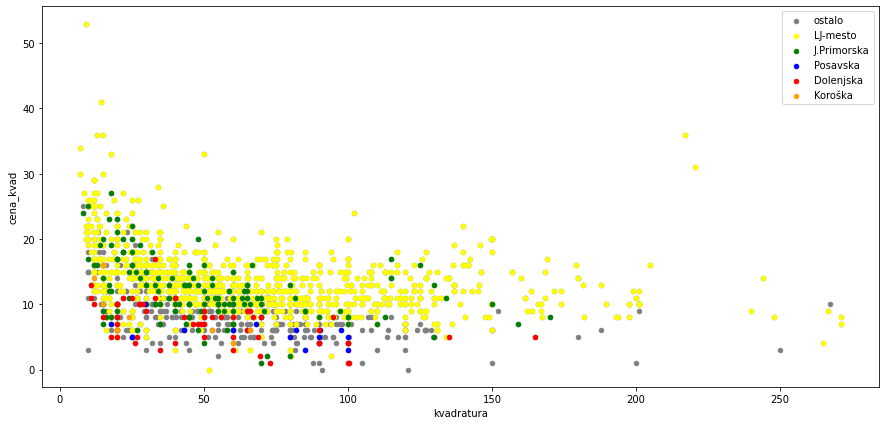

In [13]:
ax = slo_stanovanja2.plot.scatter(y='cena_kvad', x='kvadratura', color='Grey', label='ostalo')
slo_stanovanja2[slo_stanovanja2.regija == 'LJ-mesto'].plot.scatter(y='cena_kvad', x='kvadratura', color='Yellow', label='LJ-mesto', ax=ax)
slo_stanovanja2[slo_stanovanja2.regija == 'J. Primorska'].plot.scatter(y='cena_kvad', x='kvadratura', color='Green', label='J.Primorska', ax=ax)
slo_stanovanja2[slo_stanovanja2.regija == 'Posavska'].plot.scatter(y='cena_kvad', x='kvadratura', color='Blue', label='Posavska', ax=ax)
slo_stanovanja2[slo_stanovanja2.regija == 'Dolenjska'].plot.scatter(y='cena_kvad', x='kvadratura', color='Red', label='Dolenjska', ax=ax)
slo_stanovanja2[slo_stanovanja2.regija == 'Koroška'].plot.scatter(y='cena_kvad', x='kvadratura', color='Orange', label='Koroška', ax=ax, figsize=(15,7))


Iz grafa je lepo vidno, da so cene v Ljubljani(*rumena*) ter ob obali(*zelena*) veliko višje kot drugod po Sloveniji. Opazimo tudi, da se cena najema kvadrature niža z velikostjo stanovanj.

## Povprečna površina stanovanja po regijah
Opazovali bomo kakšna je povprečna površina stanovanj po posameznih regijah. V prejšnjem poglavju smo ugotovili, da je povprečna kvadratura vseh stanovanj **62 $m^2$**.

In [14]:
Stanovanja_po_regijah.mean()[['kvadratura']].sort_values('kvadratura', ascending=False)

,kvadratura
regija,
S.Primorska,67.190000
LJ-mesto,66.698052
Vse regije,66.500000
Posavska,64.920588
Savinjska,63.734000
LJ-okolica,61.023119
Pomurska,58.346667
Zasavska,58.000000
Podravska,57.987407


Največja so stanovanja na severno-primorskem ter v Ljubljani. Na dno lestvice spadajo koroška in notranjska regija

V prejšnjem poglavju smo opazili, da cena kvadrature pada ze velikostjo stanovanj. Zanima nas ali obstaja povezava med višino povprečne najemnine kvadrature ter povprečno velikostjo stanovanja v regiji.

In [15]:
Stanovanja_po_regijah.mean()[['cena_kvad', 'kvadratura']].sort_values('kvadratura', ascending=False)

,cena_kvad,kvadratura
regija,,
S.Primorska,8.600000,67.190000
LJ-mesto,13.299369,66.698052
Vse regije,5.000000,66.500000
Posavska,5.705882,64.920588
Savinjska,6.860000,63.734000
LJ-okolica,10.192661,61.023119
Pomurska,5.733333,58.346667
Zasavska,4.500000,58.000000
Podravska,7.901235,57.987407


<AxesSubplot:ylabel='regija'>

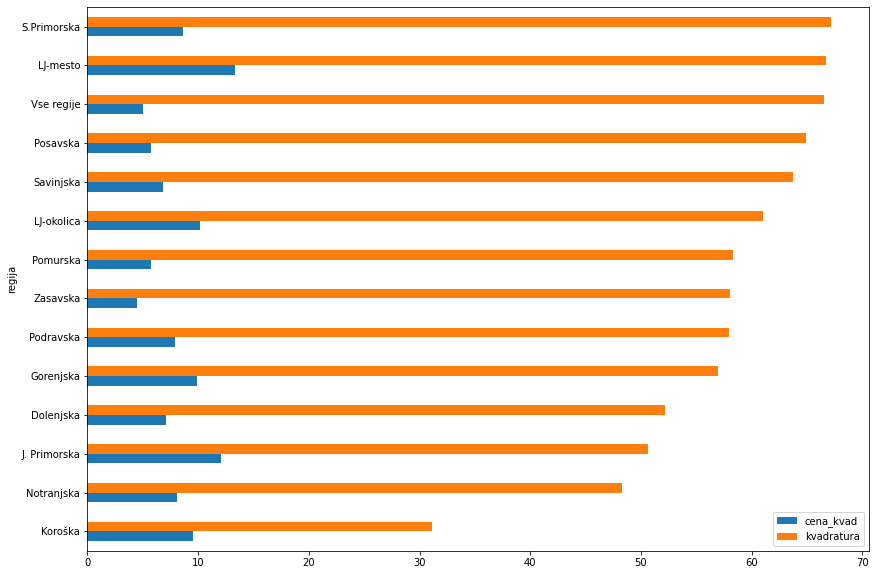

In [16]:
Stanovanja_po_regijah.mean()[['cena_kvad', 'kvadratura']].sort_values('kvadratura', ascending=True).plot.barh(figsize=(14,10))

Iz grafa opazimo, da se v mestu Ljubljana oddajajo med največjimi in tudi najdražjimi stanovanji. Opazna razlika med velikostjo in ceno je na obali, kjer so v oddaji draga in majhna stanovanja. Sklepamo, da je razlog za to oddaja stanovanj v namen turizma.

Iz podatkov je razvidno, da višina najemnin ne vpliva na velikost stanovanj v oddaji.

## Število aktivnih oglasov po regijah
Pričakujemo, da je največ aktivnih oglasov v regijah kjer je velika ponudba in povpraševanje, torej kjer je tudi višja cena najemnin, tj. v ljubljanski in južno primorski regiji.

In [17]:
po_regijah = slo_stanovanja[['regija', 'upravna']].groupby('regija').count().sort_values('upravna', ascending=False)
po_regijah

,upravna
regija,
LJ-mesto,1110
J. Primorska,144
LJ-okolica,109
Gorenjska,86
Podravska,81
Dolenjska,55
Savinjska,50
Posavska,17
Pomurska,15


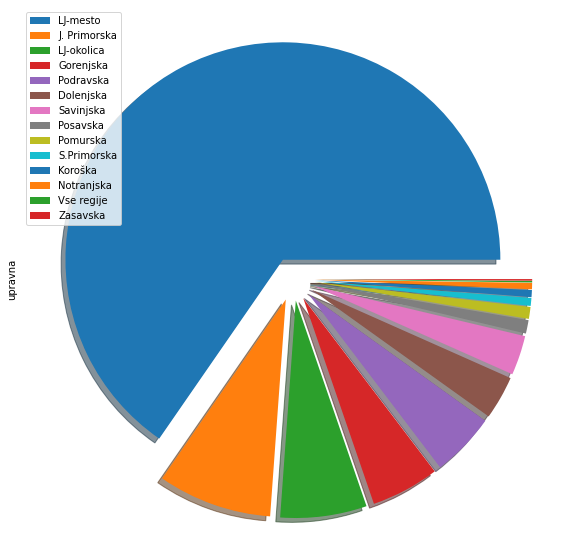

In [18]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt = po_regijah.plot.pie(y='upravna', figsize=(10, 10), shadow=True, startangle=0, labeldistance=None, explode=explode)
plt.legend(loc="upper left")

Naša hipoteza drži, največ aktivnih oglasov je v Ljubljani in ob obali. Iz grafikona je razvidno, da je ponudba po slovenskih regijah zelo neenakomerna. Razlog za to je najverjetneje neenakomerna poseljenost Slovenije in morda razlika v bivalnih standardih. Povpraševanje po stanovanjih je najvišje v Ljubljani, kjer je tudi gostota naselitve največja. V drugih regijah prevladuje podeželje kjer ljudje večinoma živijo v hišah, zato je tu manj aktivnih oglasov.

## Najemnine v mestni občini Ljubljana
Opazili smo, da ima lokacija velik vpliv na cene najemnin zato bi lahko razlike po regijah vplivale na naše rezulate. V nadaljni analizi se omejimo le na eno regijo. Obravnavali bomo ljubljansko regijo, ki ima tudi največ aktivnih oglasov.

### Vpliv števila sob na najemnino

Za začetek si poglejmo koliko sobna stanovanja so v Ljubljani najbolj ponujena.

In [19]:
stanovanja_lj = Stanovanja[Stanovanja.regija == 'LJ-mesto']

In [20]:
stanovanja_sobe = stanovanja_lj[(stanovanja_lj.tip != 'apartma') & (stanovanja_lj.tip != '1-sobni nadstandardni apartma') & (stanovanja_lj.tip != 'nadstandardna soba') & (stanovanja_lj.tip != 'stanovanje') & (stanovanja_lj.tip != '2- sobno')]

In [21]:
stanovanja_sobe[stanovanja_sobe.regija == 'LJ-mesto'].groupby('tip').count()[['upravna']].sort_values('upravna', ascending=False)

,upravna
tip,
3-sobno,229
2-sobno,221
soba,151
garsonjera,132
1-sobno,110
4-sobno,96
"2,5-sobno",62
"1,5-sobno",41
"3,5-sobno",39


Najbolj oglaševana so 3 in 2-sobna stanovanja, najverjetneje za to ker so primerna za večino 4-članskih družin. Veliko oglasov je tudi za sobe in garsonjere. Predvidevamo, da je razlog za to, to da je Ljubljana univerzitetno središče Slovenije in posledično veliko študentov v Ljubljani išče prebivališče.
Najmanj aktivnih oglasov je za več kot 4 sobna stanovanja.

Zanima nas kako tip stanovanja vpliva na ceno kvadrature. Na podlagi števila aktivnih oglasov posameznih tipov stanovanj pričakujemo, da bo cena kvadrature največja za 4,5 in 5-sobna stanovanja, saj je tudi povpraševanja zanj najmanj, ter sumimo, da mednje spadajo luksuzna stanovanja, ki so seveda tudi dražja.
Najnižje cene pričakujemo pri sobah ter garsonjerah, saj so ta najverjetneje namenjena študentom, ki nimajo tako veliki finančnih zmožnosti.

In [22]:
preurejen = stanovanja_sobe[stanovanja_sobe.regija == 'LJ-mesto']
tip = preurejen.groupby('tip').mean()[['cena_kvad']].sort_values('cena_kvad', ascending=False)
tip

,cena_kvad
tip,
garsonjera,16.363636
soba,15.635762
5 in večsobno,15.375000
1-sobno,13.500000
"1,5-sobno",13.146341
"3,5-sobno",12.461538
2-sobno,12.420814
4-sobno,12.416667
"2,5-sobno",12.032258


V nasprotju s hipotezo se kot najdražje oddajajo garsonjere in sobe, ki bi po naši predpostavki morale biti najcenejše. Sledijo jim 5 in večsobna stanovanja, najcenejša pa so presenetljivo 4,5 sobna stanovanja z **10,75€ / $m^2$** kar je celo pod slovenskim povprečjem (glej poglavje 1).

<AxesSubplot:xlabel='tip'>

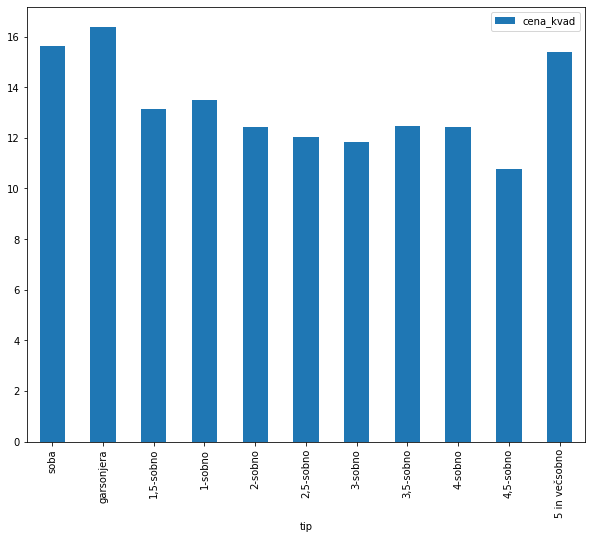

In [31]:
custom_dict = {'soba': 0, 'garsonjera': 1, '1,5-sobno': 2, '1-sobno': 3, '2-sobno': 4,'2,5-sobno': 5,'3-sobno': 6,'3,5-sobno': 7, '4-sobno': 8, '4,5-sobno': 9, '5 in večsobno': 10}

tip.sort_index(key=lambda x: x.map(custom_dict)).plot.bar(figsize=(10,8))

Iz grafa je razvidno to, da z večanjem števila sob cena nekoliko pada, kar bi lahko povezali s tem, da cena kvadrature pada z velikostjo stanovanj. To pa ne velja za 5 in večsobna stanovanja, ki so opazno dražja kot preostala večsobna stanovanja. Ponovno sklepamo, da je razlog za to, da mednje večinoma spadajo luksuzna stanovanja, namenjena premožnejšim najemnikom.

### Vpliv starosti stanovanj na višino najemnine
Obravnavali bomo odvisnost višine najemnin od starosti stanovanj. Podamo hipotezo, da so starejša stanovanja v povprečju cenejša, saj so energetsko manj učinkovita, težja za vzdrževanje in večinoma težje dostopna (nimajo dvigal, parkirišč itd.).

<AxesSubplot:xlabel='leto'>

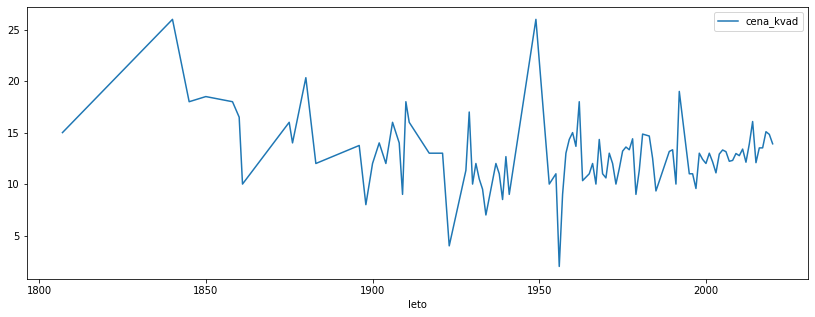

In [24]:
stanovanja_lj[stanovanja_lj.leto > 1800].groupby('leto').mean()[['cena_kvad']].plot(figsize=(14, 5))

Analizirali smo stanovanja v mestni občini Ljubljana starejša od leta 1800. Glede na graf ne moremo sklepati o soodvisnosti najemnin in starosti stanovanj, vendar opazimo, da starejša stanovanja v povprečju niso cenejša kot novejša.

## Študentska stanovanja

V Sloveniji je znano, da imajo študenti velike težave z iskanjem stanovanj. V tem poglavju želimo primerjati podatke o aktivnih oglasih študentskih stanovanj v primerjavi s slovenskim povprečjem.

**OPOMBA:** Pri analizi upoštevamo, da trenutno zaradi epidemije ni veliko aktivnih oglasov namenjenim študentom ter da je študentom v splošnem na valojo več stanovanj v poletnih mesecih oz. po koncu študijskega obdobja.

In [25]:
stanovanja = pd.read_csv("obdelani-podatki\podatki.csv")
studenti = pd.read_csv("obdelani-podatki\studenti.csv")

V spodnji razpredelnici so razvrščeni podatki o stanovanjih, ki so na strani *nepremicnine.net* označena kot študentska stanovanja.

In [26]:
stanovanja['cena_kvad'] = (stanovanja.cena) // stanovanja.kvadratura
studentska_stanovanja = pd.merge(stanovanja, studenti)
studentska_stanovanja['cena_kvad_s'] = (studentska_stanovanja.cena // studentska_stanovanja.kvadratura)
studentska_stanovanja

,id,kvadratura,tip,leto,cena,regija,upravna,obcina,cena_kvad,cena_kvad_s
0,6284832,30.0,garsonjera,1991,420.0,Gorenjska,Radovljica,Bled,14.0,14.0
1,6299045,22.0,soba,2018,200.0,Gorenjska,Radovljica,Bled,9.0,9.0
2,6317821,90.9,2-sobno,2008,12.0,Savinjska,Celje,Celje,0.0,0.0
3,6330616,10.0,soba,2019,150.0,LJ-okolica,"Lj. J&Z del (Vič, Rudnik)",Brezovica,15.0,15.0
4,6334909,38.0,1-sobno,2019,500.0,Gorenjska,Radovljica,Bled,13.0,13.0
5,6344063,28.0,garsonjera,1981,440.0,LJ-mesto,Lj. Bežigrad,Ljubljana,15.0,15.0
6,6347655,15.0,soba,2019,200.0,Savinjska,Celje,Celje,13.0,13.0
7,6356553,18.5,garsonjera,2017,320.0,LJ-mesto,Lj. Moste-Polje,Ljubljana,17.0,17.0
8,6359134,16.0,soba,2018,270.0,Gorenjska,Radovljica,Bled,16.0,16.0
9,6361896,80.3,3-sobno,1980,200.0,LJ-mesto,Lj. Bežigrad,Ljubljana,2.0,2.0


In [27]:
sum(studentska_stanovanja.cena_kvad) // 29

13.0

Povprečna najemnina na kvadratni meter za študentsko stanovanja **13€**. To je nad slovenskim povprečjem (**11€ / $m^2$**) in ekvivalentno povprečni ceni v Ljubljani, kljub temu da niso vsa stanovanja iz ljubljanske regije. To pomeni, da so cene študentskih stanovanj v samem vrhu slovenskih najemnin.

Podatke o študentskih stanovanjih imamo za naslednje regije: Ljubljana(mesto), Ljubljana(okolica), Gorenjska, Savinjska.

Kot smo ugotovili v prvem razdelku se najemnine po regijah močno razlikujejo. Zato bomo za vsako regijo posebaj primerjali povprečno ceno vseh stanovanj ter povprečno ceno študentskih stanovanj.

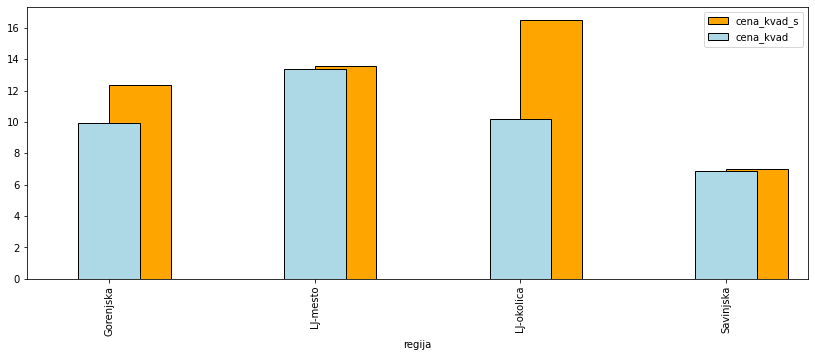

In [28]:
ax = po_regijah_stud = studentska_stanovanja.groupby('regija').mean()[['cena_kvad_s']].plot.bar(color='Orange', align='edge', width=0.3, edgecolor='Black')
po_regijah = stanovanja[(stanovanja.regija == 'LJ-mesto') | (stanovanja.regija == 'Gorenjska') | (stanovanja.regija == 'Savinjska') | (stanovanja.regija == 'LJ-okolica')].groupby('regija').mean()[['cena_kvad']].plot.bar(color='LightBlue', ax = ax, figsize=(14, 5), width=0.3, edgecolor='Black')

Iz grafa je razvidno, da so najemnine študentskih stanovanj (*oranžno*) v prav vseh regijah višje kot povprečna stanovanja (*modro*). Največja razlika je v okolici Ljubljane. 

Razlog za to, da lahko najemodajalci oddajajo stanovanja študentom po tako visokih cenah, je v tem, da je večina pogodb sklenjenih na študenta in ne na gospodinjstvo. To pomeni, da so na primer 4 študentje pripravljeni plačati skupaj več kot običajna štiričlanska družina.

## Povzetek
Na višino najemnin vplivajo različni dejavniki, največji vpliv pa imajo regije. Po višini najemnin vidno izstopata obalna in ljubljanska regija, v katerih je tudi največja ponudba oddaje stanovanj. Po velikosti stanovanj so na vrhu tista iz severno primorske in ljubljanske regije, med manjšimi pa se zaradi vpliva turizma pojavljajo stanovanja v južno primorski regiji ter v koroški in notranjski.

V nadaljni analizi smo obravnavali stanovanja v Ljubljani. Ugotovili smo, da je največ ponudbe za 2 in 3-sobna stanovanja ter za sobe in garsonjere. Slednje se oddajajo tudi po najvišjih cenah, kar je v povezavi z njihovo namembnostjo (predpostavili smo, da se sobe in garsonjere oddajajo predvsem študentom) v nasprotju z našo predpostavko.

Posledično smo se dotaknili še problematike glede visokih cen študentskih stanovanj. Potrdili smo hipotezo, ki pravi da se študentska stanovanja v večini oddajajo za višje najemnine kot običajna stanovanja.